# Q: What is the Highest Grossing Movie With The Least Production Cost?

In [308]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [309]:
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [310]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df


In [311]:
#End of importing files and libraries

In [312]:
# create dataframes out of each file
title_crew_df = csv_files_dict['imdb_title_crew_gz']
movies_df = csv_files_dict['tmdb_movies_gz']
title_akas_df = csv_files_dict['imdb_title_akas_gz']
title_ratings_df = csv_files_dict['imdb_title_ratings_gz']
name_basics_df = csv_files_dict['imdb_name_basics_gz']
title_basics_df = csv_files_dict['imdb_title_basics_gz']
movie_budgets_df = csv_files_dict['tn_movie_budgets_gz']
movie_gross_df = csv_files_dict['bom_movie_gross_gz']
title_principals_df = csv_files_dict['imdb_title_principals_gz']

In [313]:
#turn movie budgets file into a dataframe and find out it's type

type(movie_budgets_df)
movie_budgets_df.describe()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",King Kong,"$20,000,000",$0,$0
freq,24,3,231,548,367


In [314]:
#find out how many rows and columns in the file
movie_budgets_df.shape

(5782, 5)

In [315]:
#look at the first five rows of the dataframe
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [316]:
#find out information to clean the dataframe
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [317]:
#converting production_budget, domestic_gross, and worldwide_gross from objects to int values
mb = movie_budgets_df
mb.production_budget = mb.production_budget.replace('[\$,]', '', regex=True).astype(int)
mb.domestic_gross = mb.domestic_gross.replace('[\$,]', '', regex=True).astype(int)
mb.worldwide_gross = mb.worldwide_gross.replace('[\$,]', '', regex=True).astype(int)


In [318]:
#check to see conversion
mb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


In [319]:
mb.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [320]:
#drop the column without having to reasign the df
mb.drop('worldwide_gross', axis=1, inplace=True)
mb.head()  #check to see if the column is dropped 

,release_date,movie,production_budget,domestic_gross
id,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382


In [321]:
# clean data set by dropping NaN values
mb.dropna()

,release_date,movie,production_budget,domestic_gross
id,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382
...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000,0
79,"Apr 2, 1999",Following,6000,48482
80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338


Text(0.5, 1.0, 'Scatter Plot of Profits v. Budgets')

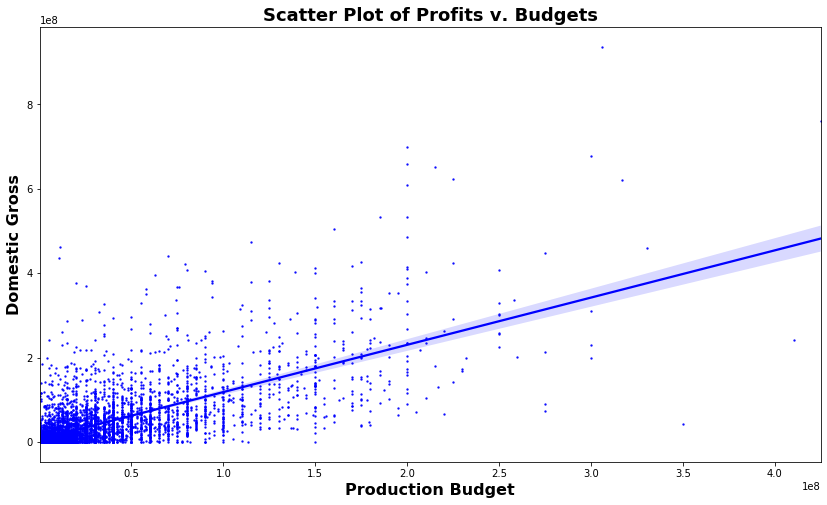

In [322]:
#Scatter Plot of Profits of Movies from 2010 to 2018
plt.figure(figsize=(14,8))
l = sns.regplot(x =mb["production_budget"], y = mb["domestic_gross"], marker='o', color='blue', scatter_kws={'s':2})
plt.xlabel('Production Budget', fontsize=16, fontweight='bold')
plt.ylabel('Domestic Gross', fontsize=16, fontweight='bold')
plt.title('Scatter Plot of Profits v. Budgets', fontsize=18, fontweight='bold')


In [323]:
# From the above graph we can see that at a production budget of 2E8 there is
# is a high gross between 5E8 to 7E8...what genres are these

In [324]:
# narrow down list to Production budget of 2E8 and Domestic gross between 
# 5 to 7E8


In [325]:
mb_prod_budg_2 = mb[mb.production_budget == 200000000]

mb_prod_budg_2.sort_values(by= "domestic_gross", ascending = True) 
mb_prod_budg_2.describe()
mb_prod_budg_2

,release_date,movie,production_budget,domestic_gross
id,,,,
42,"Feb 16, 2018",Black Panther,200000000,700059566
43,"Dec 19, 1997",Titanic,200000000,659363944
44,"Jun 15, 2018",Incredibles 2,200000000,608581744
45,"Dec 16, 2016",Rogue One: A Star Wars Story,200000000,532177324
46,"Jun 17, 2016",Finding Dory,200000000,486295561
47,"Jun 18, 2010",Toy Story 3,200000000,415004880
48,"May 3, 2013",Iron Man 3,200000000,408992272
49,"May 5, 2017",Guardians of the Galaxy Vol 2,200000000,389813101
50,"Jun 30, 2004",Spider-Man 2,200000000,373524485


In [359]:
mb_prod_budg_2.profit_percent = mb_prod_budg_2.profit_percent.replace('[\$,]', '', regex=True).astype(int)
mb_prod_budg_2['profit_percent'] = (mb_prod_budg_2.loc[:,'domestic_gross']/mb_prod_budg_2.loc[:,'production_budget'])*100
#mb_prod_budg_2['profit_percent'] = (mb_prod_budg_2.domestic_gross/mb_prod_budg_2.production_budget)*100
#mb_prod_budg_2.profit_percent = mb_prod_budg_2.profit_percent.replace('[\$,]', '', regex=True).astype(int)
mb_prod_budg_2.info
mb_prod_budg_2.head(10)
#mb.production_budget = mb.production_budget.replace('[\$,]', '', regex=True).astype(int)

/Users/ArashPeimani/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/ArashPeimani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,release_date,movie,production_budget,domestic_gross,%Profit,profit_percent
id,,,,,,
42,"Feb 16, 2018",Black Panther,200000000,700059566,350.029783,350.029783
43,"Dec 19, 1997",Titanic,200000000,659363944,329.681972,329.681972
44,"Jun 15, 2018",Incredibles 2,200000000,608581744,304.290872,304.290872
45,"Dec 16, 2016",Rogue One: A Star Wars Story,200000000,532177324,266.088662,266.088662
46,"Jun 17, 2016",Finding Dory,200000000,486295561,243.147781,243.147781
47,"Jun 18, 2010",Toy Story 3,200000000,415004880,207.502440,207.502440
48,"May 3, 2013",Iron Man 3,200000000,408992272,204.496136,204.496136
49,"May 5, 2017",Guardians of the Galaxy Vol 2,200000000,389813101,194.906551,194.906551
50,"Jun 30, 2004",Spider-Man 2,200000000,373524485,186.762242,186.762242


In [343]:
#take the top 10 by %profit
top10 = mb_prod_budg_2.nlargest(10,'%Profit')
top10
top10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 42 to 51
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       10 non-null     object 
 1   movie              10 non-null     object 
 2   production_budget  10 non-null     int64  
 3   domestic_gross     10 non-null     int64  
 4   %Profit            10 non-null     float64
 5   profit_percent     10 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 560.0+ bytes


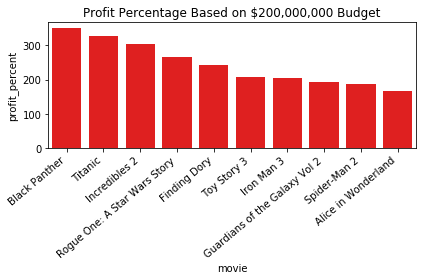

In [356]:
#check to see if it was converted
mb_prod_budg_2.info

#top10.groupby('movie').count().sort_values(by='profit_percent', ascending=False).plot(kind='bar', y='profit_percent', figsize = (12,6))

In [329]:
genre_categories = pd.read_csv("cleaned_genre_exploration.csv")

type(genre_categories) #verify 


pandas.core.frame.DataFrame

In [330]:
mb_genre = genre_categories.append(df_title_basics)

In [331]:

mb_genre.head()
mb_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148900 entries, 0 to 146143
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         2756 non-null    object 
 1   Unnamed: 0.1       2756 non-null    float64
 2   genre_ids          2756 non-null    object 
 3   id                 2756 non-null    float64
 4   original_language  2756 non-null    object 
 5   popularity         2756 non-null    float64
 6   release_date       2756 non-null    object 
 7   vote_average       2756 non-null    float64
 8   vote_count         2756 non-null    float64
 9   tconst             148900 non-null  object 
 10  primary_title      148900 non-null  object 
 11  start_year         148900 non-null  float64
 12  runtime_minutes    148900 non-null  float64
 13  G1                 143492 non-null  object 
 14  G2                 61327 non-null   object 
 15  G3                 30766 non-null   object 
 16  id

In [332]:
#converting production_budget, domestic_gross, and worldwide_gross from objects to int values
#converting release_date from object to datetime value
mb_genre.production_budget = mb_genre.production_budget.replace('[\$,]', '', regex=True).astype(int)
mb_genre.domestic_gross = mb_genre.domestic_gross.replace('[\$,]', '', regex=True).astype(int)
mb_genre.worldwide_gross = mb_genre.worldwide_gross.replace('[\$,]', '', regex=True).astype(int)

mb_genre.info()

ValueError: Cannot convert non-finite values (NA or inf) to integer

## Data Cleaning

### Dealing with datatypes

In [ ]:
#drop the column without having to reasign the df
movie_budgets_df.drop('worldwide_gross', axis=1, inplace=True)
movie_budgets_df.head()  #check to see if the column is dropped 

In [ ]:
#confirming no na values
#movie_budgets_df.isna().sum()

In [ ]:
#changing dtype of columns
#we want to change the types of 3 columns. 

def convert_amt_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int')
    return df

In [ ]:
#making a list of all the cols where we want to change the dtype 
money_cols = ['production_budget', 'domestic_gross']

for col in money_cols:
    movie_budgets_df = convert_amt_to_int(movie_budgets_df, col)

In [ ]:
# check to see if type was changed to int
movie_budgets_df.info()

In [ ]:
#? How do I set up data to compare 
#highest grossing of the lowest production cost

In [ ]:
df = movie_budgets_df
plt.scatter(df['production_budget'],df['domestic_gross'])
ax = sns.scatterplot(x="production_budget", y="domestic_gross", data=df)
#ax.set(xticks=np.arange(1.5E8, 4E8, 1E8),
  #    yticks=np.arange(0.5E8, 7E8, 2E8))
plt.show()

In [ ]:
narrow_prod_budget_df = df[(df['production_budget'] >= 1.8E8) & 
                           (df['production_budget'] <= 2.2E8)]
narrow_prod_budget_df.info()
narrow_prod_budget_df


## Split Up Genres

### Bring in the title_basics Data Frame 

In [ ]:
#create a dataframe out of a csv file
genre_categories = pd.read_csv("cleaned_genre_exploration.csv")

type(genre_categories) #verify 

In [ ]:
genre_categories.info()

In [ ]:
genre_categories.head()

In [ ]:
#Title basics - creating the df
df_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
#Creating the split genre column
df_title_basics[['G1','G2','G3']] = df_title_basics.genres.str.split(",",expand=True) 
#Dropping the old genre column
df_title_basics.drop(['genres'], axis=1, inplace = True)
#cleaned runtime minutes by using mean
mean_runtime = df_title_basics['runtime_minutes'].mean()
df_title_basics['runtime_minutes'].fillna(mean_runtime, inplace=True)
#cleaning original title by replacing missing ones with the primary title
df_title_basics['original_title'].fillna('primary_title', inplace=True)

display(df_title_basics.head())
display(df_title_basics.info())
display(df_title_basics.isna().sum())

In [ ]:
#result = df1.append(df2)
combo_category = genre_categories.append(df_title_basics)

In [ ]:
combo_category.head()
combo_category.info()

In [ ]:
#combo_category.isnull().any()
combo_category.isna().sum()
#combo_category.isnull().sum()
combo_category.info()

In [ ]:
#combo_category.dropna(inplace = True)

In [ ]:
#changing dtype of columns
#we want to change the types of 3 columns. Good idea to write a function for this

def convert_amt_to_int(combo_category, col):
    combo_category[col] = combo_category[col].str.replace("$", "").str.replace(",", "").astype('int')
    return combo_category
combo_category.info()

#combo_category = combo_category.astype({"production_budget": int, "domestic_gross": int})

In [ ]:
combo_category.head()

In [ ]:
combo_category.info()
combo_category

In [ ]:
#changing dtype of columns
#we want to change the types of 3 columns. Good idea to write a function for this

# def convert_amt_to_int(df, col):
#     df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int')
#     return df

In [ ]:
#making a list of all the cols where we want to change the dtype 

# money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

# for col in money_cols:
#     movie_budgets_df = convert_amt_to_int(movie_budgets_df, col)

In [ ]:
limited_prod_budget = df[(df['production_budget'] >= 1.8E8) & 
              (df['production_budget'] <= 2.2E8)]#['production_budget']
limited_prod_budget.info()

In [ ]:
plt.figure(figsize=(10,6))
df = combo_category
ax = sns.barplot(x= ('production_budget'), y= 'G1', color = 'c', data=df)
                 #order=df.sort_values('production_budget'))
#ax. set(xlim=(1.8, 4))
ax.set_xlabel('Production_Budget')
ax.set_ylabel('Genre')

In [ ]:
#ts.sort_values().plot(use_index=False)
x = np.arange(10)
ax1 = plt.subplot(1,1,1)
w = 0.3
#plt.xticks(), will label the bars on x axis with the respective country names.
plt.xticks(x + w /2, ['G1'], rotation='vertical')
pop =ax1.bar(x, ['production_budget'], width=w, color='b', align='center')
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()
#We have calculated GDP by dividing gdpPerCapita to population.
domestic_gross =ax2.bar(x + w, ['domestic_gross'], width=w,color='g',align='center')
#Set the Y axis label as GDP.
plt.ylabel('domestic_gross')
#To set the legend on the plot we have used plt.legend()
plt.legend(['production_budget', 'domestic_gross'],['Production Budget in Millions', 'Domestic Gross'])
#To show the plot finally we have used plt.show().
plt.show()

In [ ]:
#genre = genre_categories = df[['G1']]
genre_categories = [(df['production_budget'] >= 1.8E8) & 
                    (df['production_budget'] <= 2.2E8), ('G1')]

                     
#df['production_budget'] >= 1.8E8) & (df['production_budget'] <= 2.2E8)

#turn movie budgets file into a dataframe and find out it's type
movie_budgets_df = csv_files_dict['tn_movie_budgets_gz']
type(movie_budgets_df)


genre_categories = pd.read_csv("cleaned_genre_exploration.csv")
genre_categories.info()
genre_categories

In [ ]:
title_basics_df.head()

In [ ]:
title_basics_df.shape

In [ ]:
title_basics_df.info()

In [ ]:
#drop rows where data is missing
cleanedTB = title_basics_df.dropna()
cleanedTB

In [ ]:
#check the counts after rows dropped
cleanedTB.info()

In [ ]:
# title_basics_df['genres'] = title_basics_df['genres'].apply(lambda x: 
#                                                             x.split(",") 
#                                                             if x else x)
# title_basics_df.head()

In [ ]:
#making a set of all genres we have. set doesn't allow duplicate values

# all_genres = set()
# for genres in cleanedTB['genres']:
#     if genres:
#         all_genres.update(genres)

In [ ]:
#show all the genres
# all_genres